In [1]:
import  pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score  , roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [2]:
data = pd.read_csv(r"E:\python projects\Datasets\insurance_metrics_saudi.csv")
data.head()

,Customer_ID,Policy_Type,Annual_Premium_SAR,Claims_This_Year,Total_Claim_Amount_SAR,Operating_Expenses_SAR,Earned_Premiums_SAR,Complaints_Received,Policies_Renewed,Policies_Issued,Solvency_Margin_SAR,Net_Assets_SAR,Avg_Settlement_Days,Fraud_Flag,Loss_Ratio,Expense_Ratio,Combined_Ratio,Persistency_Rate,Solvency_Ratio
0,1,Home,19799,2,10659,6290,5962,2,0,4,84552,185508,8,0,1.787823,1.055015,2.842838,0.0,2.194011
1,2,Auto,19676,1,34699,6762,21325,0,0,4,96070,81580,42,0,1.627151,0.317093,1.944244,0.0,0.849172
2,3,Home,15439,3,17198,5985,16317,0,0,4,81426,118039,56,0,1.053993,0.366795,1.420788,0.0,1.449648
3,4,Home,18009,2,30721,6455,6924,0,0,2,141668,213380,32,0,4.436886,0.932265,5.369151,0.0,1.506198
4,5,Health,11035,1,5976,4796,9013,1,0,3,94670,179758,23,0,0.663042,0.532120,1.195163,0.0,1.898785


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             50000 non-null  int64  
 1   Policy_Type             50000 non-null  object 
 2   Annual_Premium_SAR      50000 non-null  int64  
 3   Claims_This_Year        50000 non-null  int64  
 4   Total_Claim_Amount_SAR  50000 non-null  int64  
 5   Operating_Expenses_SAR  50000 non-null  int64  
 6   Earned_Premiums_SAR     50000 non-null  int64  
 7   Complaints_Received     50000 non-null  int64  
 8   Policies_Renewed        50000 non-null  int64  
 9   Policies_Issued         50000 non-null  int64  
 10  Solvency_Margin_SAR     50000 non-null  int64  
 11  Net_Assets_SAR          50000 non-null  int64  
 12  Avg_Settlement_Days     50000 non-null  int64  
 13  Fraud_Flag              50000 non-null  int64  
 14  Loss_Ratio              50000 non-null

| **Column Name**               | **Description**                                                                                     | **Business Relevance**                                                                                                                                |
| ----------------------------- | --------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Customer\_ID**              | A unique identifier assigned to each customer.                                                      | Used to track customer behavior, policy interactions, and history. **Value is unique; not ranked as high/low.**                                       |
| **Policy\_Type**              | Type of insurance policy (e.g., Home, Auto, Health).                                                | Helps in segmentation and risk evaluation. **No numeric ranking; different types have different risk/revenue profiles.**                              |
| **Annual\_Premium\_SAR**      | Annual amount the customer pays for the policy.                                                     | Core revenue metric. **Higher is better** (indicates higher revenue per customer), but should be balanced with risk and claims.                       |
| **Claims\_This\_Year**        | Number of claims filed by the customer in the current year.                                         | Key risk indicator. **Lower is better**—fewer claims suggest a low-risk customer. **Higher can signal fraud or high risk.**                           |
| **Total\_Claim\_Amount\_SAR** | Total value of claims submitted in the current year.                                                | Impacts profitability. **Lower is better** for the insurer, as high amounts increase payouts and affect loss ratios.                                  |
| **Operating\_Expenses\_SAR**  | Total expenses for managing a customer/policy.                                                      | Affects operational efficiency. **Lower is better**, as high expenses reduce margins even if premiums are high.                                       |
| **Earned\_Premiums\_SAR**     | The portion of premium earned based on time elapsed in policy term.                                 | Revenue recognized in the accounting period. **Higher is better**, reflects actual income available to cover claims and expenses.                     |
| **Complaints\_Received**      | Number of complaints submitted by the customer.                                                     | Service quality indicator. **Lower is better**, indicates satisfaction and reduces churn risk.                                                        |
| **Policies\_Renewed**         | Number of times the customer renewed policies.                                                      | Loyalty indicator. **Higher is better**, indicates strong retention and customer lifetime value.                                                      |
| **Policies\_Issued**          | Number of new policies issued to the customer.                                                      | Acquisition/cross-sell metric. **Higher is better**, reflects marketing success and upselling opportunities.                                          |
| **Solvency\_Margin\_SAR**     | Excess of assets over liabilities for customer-related risk.                                        | Indicator of financial buffer. **Higher is better**, shows ability to absorb large claim shocks.                                                      |
| **Net\_Assets\_SAR**          | Net assets associated with the customer-insurer relationship.                                       | Shows overall financial strength. **Higher is better**, contributes to company solvency and growth capacity.                                          |
| **Avg\_Settlement\_Days**     | Average number of days to settle claims.                                                            | Key operational KPI. **Lower is better**, faster settlement improves customer experience and reduces churn risk.                                      |
| **Fraud\_Flag**               | Indicates if the customer is suspected/confirmed to have committed fraud (1 = fraud, 0 = no fraud). | Used for risk management. **Value should be 0**; 1 indicates fraud risk that requires action.                                                         |
| **Loss\_Ratio**               | Total claims divided by earned premiums (Claims / Earned Premiums).                                 | Profitability metric. **Lower is better**. **< 1.0** indicates profitability; **> 1.0** means losses exceed premiums earned.                          |
| **Expense\_Ratio**            | Operating expenses divided by earned premiums.                                                      | Efficiency metric. **Lower is better**, ideally < 0.3–0.4. High values signal poor cost control.                                                      |
| **Combined\_Ratio**           | Sum of Loss Ratio and Expense Ratio.                                                                | Underwriting profitability. **Lower is better**. **< 1.0** is profitable; **> 1.0** means the company is losing money on underwriting.                |
| **Persistency\_Rate**         | % of issued policies that are later renewed.                                                        | Customer retention measure. **Higher is better**. High persistency improves long-term revenue stability.                                              |
| **Solvency\_Ratio**           | Available solvency margin divided by required margin.                                               | Regulatory and financial health metric. **Higher is better**. Insurers should maintain this above regulatory thresholds (typically > 1.5 is healthy). |


In [4]:
data.isnull().sum()

Customer_ID               0
Policy_Type               0
Annual_Premium_SAR        0
Claims_This_Year          0
Total_Claim_Amount_SAR    0
Operating_Expenses_SAR    0
Earned_Premiums_SAR       0
Complaints_Received       0
Policies_Renewed          0
Policies_Issued           0
Solvency_Margin_SAR       0
Net_Assets_SAR            0
Avg_Settlement_Days       0
Fraud_Flag                0
Loss_Ratio                0
Expense_Ratio             0
Combined_Ratio            0
Persistency_Rate          0
Solvency_Ratio            0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.describe()

,Customer_ID,Annual_Premium_SAR,Claims_This_Year,Total_Claim_Amount_SAR,Operating_Expenses_SAR,Earned_Premiums_SAR,Complaints_Received,Policies_Renewed,Policies_Issued,Solvency_Margin_SAR,Net_Assets_SAR,Avg_Settlement_Days,Fraud_Flag,Loss_Ratio,Expense_Ratio,Combined_Ratio,Persistency_Rate,Solvency_Ratio
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,25000.500000,10498.867120,1.203980,25070.497660,5237.570220,12992.830740,0.200020,0.0,2.495280,125108.545520,155183.403760,30.463320,0.047420,3.376750,0.706545,4.083296,0.0,1.434511
std,14433.901067,5484.712075,1.091694,14462.636849,2743.324763,6940.376172,0.447544,0.0,1.117713,43338.948861,54790.805959,16.720849,0.212538,4.753332,0.962689,5.430908,0.0,0.811780
min,1.000000,1000.000000,0.000000,0.000000,500.000000,1000.000000,0.000000,0.0,1.000000,50004.000000,60001.000000,2.000000,0.000000,0.000000,0.020336,0.027060,0.0,0.303307
25%,12500.750000,5786.000000,0.000000,12488.750000,2869.000000,6986.000000,0.000000,0.0,1.000000,87745.750000,107743.500000,16.000000,0.000000,0.966600,0.218951,1.339850,0.0,0.847230
50%,25000.500000,10493.000000,1.000000,24997.500000,5232.000000,13000.000000,0.000000,0.0,2.000000,125035.500000,155267.000000,30.000000,0.000000,1.927037,0.403077,2.328040,0.0,1.240529
75%,37500.250000,15226.000000,2.000000,37667.000000,7607.000000,19040.000000,0.000000,0.0,3.000000,162588.750000,202415.500000,45.000000,0.000000,3.605294,0.751013,4.349112,0.0,1.797758
max,50000.000000,19999.000000,8.000000,49998.000000,9999.000000,24998.000000,4.000000,0.0,4.000000,199998.000000,249999.000000,59.000000,1.000000,49.083749,9.688735,56.208867,0.0,4.946442


### 📊 **Descriptive Insights from the Insurance Dataset (n = 50,000)**

#### 🧾 **1. General Financial Indicators**

* **Annual Premium (SAR):**

  * Mean: **SAR 10,498**, ranging from **SAR 1,000 to 19,999**
  * Indicates broad premium segmentation; high variance (std ≈ SAR 5,485) suggests varied customer tiers.

* **Total Claim Amount (SAR):**

  * Mean: **SAR 25,070**, with a max of nearly **SAR 50,000**
  * High standard deviation (**SAR 14,462**) indicates large claim variability.

* **Operating Expenses:**

  * Avg: **SAR 5,237**, ranging from **SAR 500 to 9,999**
  * Expense ratio insights may be drawn in conjunction with earned premiums.

* **Earned Premiums:**

  * Avg: **SAR 12,993**, with a wide range up to **SAR 24,998**

---

#### 📌 **2. Policy Activity & Customer Behavior**

* **Claims This Year:**

  * Average: **1.2 claims per customer**
  * Max: **8 claims**, indicating a small but impactful high-risk segment

* **Policies Issued:**

  * Average: **\~2.5 per customer**, max is 4
  * **Policies Renewed** consistently show **zero across all customers**, possibly due to:

    * Data collection issue
    * Focus on new policy sales

* **Complaints Received:**

  * Rare events (avg: 0.2, max: 4) — may not significantly affect aggregate metrics, but worth investigating for quality control

* **Persistency Rate:**

  * Uniformly **0.0 for all entries** — potential data error or non-renewal-based model

---

#### 💼 **3. Profitability & Risk Ratios**

* **Loss Ratio:**

  * Mean: **3.38**, but maxes out at **49.08**
  * Highly skewed — most customers have low ratios, but some are extremely loss-heavy

* **Expense Ratio:**

  * Avg: **0.71**, relatively consistent
  * Indicates moderate efficiency in expense control, but can spike up to **9.69**

* **Combined Ratio:**

  * Mean: **4.08**, with a wide range up to **56.21**
  * A combined ratio > 1 suggests **unprofitability** — \~50% of customers likely exceed this benchmark

* **Solvency Ratio:**

  * Mean: **1.43**, ranges from **0.30 to 4.95**
  * Strong average solvency; however, \~25% of entities fall below **0.85**, a potential red flag for regulatory compliance

---

#### 🚨 **4. Fraud Metrics**

* **Fraud\_Flag:**

  * Mean: **0.0474 → 4.74% of customers are flagged as fraud**
  * Indicates a low, but non-negligible fraud rate in the portfolio

---

#### 🧮 **5. Settlement Efficiency**

* **Avg Settlement Days:**

  * Mean: **30.46 days**, with a wide spread (min: 2, max: 59)
  * **Median: 30 days**, consistent with industry norms but room for efficiency gains in outliers

---

### 🔍 **Key Insights & Recommendations**

| Area                | Insight                                                                             |
| ------------------- | ----------------------------------------------------------------------------------- |
| Profitability       | High loss & combined ratio volatility suggests a need for better risk segmentation. |
| Fraud Detection     | With \~4.7% fraud rate, continued investment in fraud analytics is justified.       |
| Operations          | Zero policy renewals & persistency rate = **data quality or model design issue**.   |
| Solvency Monitoring | \~25% entities have solvency < 0.85 → may breach regulatory thresholds.             |
| Claims Management   | High variance in claim amounts and settlement time → review high-impact cases.      |



In [7]:
total_claims_SAR = data['Total_Claim_Amount_SAR'].sum()
total_num_claims = data['Claims_This_Year'].sum()
total_expenses_SAR = data['Operating_Expenses_SAR'].sum()
number_of_policies_issued = data['Policies_Issued'].sum()
total_complaints = data['Complaints_Received'].sum()
assets_SAR = data['Net_Assets_SAR'].sum()
total_premiums_SAR = data['Annual_Premium_SAR'].sum()
total_loss_ratio = total_claims_SAR / total_premiums_SAR * 100
total_expense_ratio = total_expenses_SAR / total_premiums_SAR * 100
complaints_per_1000_policies = (total_complaints / number_of_policies_issued) * 1000
claims_per_policy = total_num_claims / number_of_policies_issued * 100
average_claim_value = total_claims_SAR / total_num_claims 
premium_per_policy = total_premiums_SAR / number_of_policies_issued
claims_to_assets_ratio = total_claims_SAR / assets_SAR *100


print("Total Claims in SAR:", total_claims_SAR)
print("Total Number of Claims:", total_num_claims)
print("Total Expenses in SAR:", total_expenses_SAR)
print("Number of Policies Issued:", number_of_policies_issued)
print("Total Complaints:", total_complaints)
print("Total Assets in SAR:", assets_SAR)
print("Total Premiums in SAR:", total_premiums_SAR)
print("Total Loss Ratio:", round(total_loss_ratio,2),"%")
print("Total Expense Ratio:", round(total_expense_ratio,2),"%")
print("Complaints per 1000 Policies:", round(complaints_per_1000_policies,2),"%")
print("Claims per Policy:", round(claims_per_policy,2),"%")
print("Average Claim Value:", round(average_claim_value,2),"SAR")
print("Premium per Policy:", round(premium_per_policy,2),"SAR")
print("Claims to Assets Ratio:", round(claims_to_assets_ratio,2),"%")

Total Claims in SAR: 1253524883
Total Number of Claims: 60199
Total Expenses in SAR: 261878511
Number of Policies Issued: 124764
Total Complaints: 10001
Total Assets in SAR: 7759170188
Total Premiums in SAR: 524943356
Total Loss Ratio: 238.79 %
Total Expense Ratio: 49.89 %
Complaints per 1000 Policies: 80.16 %
Claims per Policy: 48.25 %
Average Claim Value: 20823.02 SAR
Premium per Policy: 4207.49 SAR
Claims to Assets Ratio: 16.16 %


📊 Insurance Business Insights Summary
🔹 1. Severe Underwriting Loss
Total Loss Ratio: 238.79%
The company is paying SAR 2.39 in claims for every SAR 1 collected in premiums. This indicates serious pricing or risk management issues and reflects unsustainable underwriting practices.

🔹 2. High Operational Costs
Total Expense Ratio: 49.89%
Nearly half of all premium income is consumed by operating expenses, showing a need for cost optimization and leaner operations.

🔹 3. Combined Ratio Danger Zone
Combined Ratio = 238.79% + 49.89% = 288.68%
This indicates the company is spending nearly 3x its earned premiums — leading to massive underwriting losses. The insurer is likely relying on investment returns or capital reserves to cover these deficits.

🔹 4. High Complaint Rate
Complaints per 1,000 Policies: 80.16
This is an alarmingly high rate, suggesting significant issues in customer service, claims processing, or policy terms. It could impact reputation, retention, and regulatory standing.

🔹 5. Frequent Claims
Claims per Policy: 48.25%
Almost 1 in every 2 policies results in a claim. This suggests either:

High-risk customer segments

Inadequate underwriting criteria

Possibly moral hazard behavior

🔹 6. Unfavorable Premium-to-Claim Economics
Average Claim Value: SAR 20,823.02

Premium per Policy: SAR 4,207.49
This gap is unprofitable by design. The insurer pays ~5x more in claims than it collects in premiums per policy. Premium pricing needs urgent revision based on historical claim patterns.

🔹 7. Claims Are Manageable Relative to Assets
Claims to Assets Ratio: 16.16%
The company has adequate assets to cover claim obligations in the short term. This indicates no immediate solvency concern, but if the loss trends continue, capital erosion is inevitable.

✅ Recommendations
Reevaluate Premium Pricing: Align premiums with actual risk and claim frequency.

Tighten Underwriting Standards: Introduce stricter screening and risk segmentation.

Reduce Operational Overhead: Streamline processes and adopt automation to cut expenses.

Investigate Complaint Root Causes: Improve customer service and claims transparency.

Perform Product Line Analysis: Identify which products are driving the losses.

Implement Fraud Detection: Evaluate whether fraud is inflating claims and complaints.


In [8]:
data['Loss_Ratio_new'] = data['Total_Claim_Amount_SAR'] / data['Annual_Premium_SAR']
data['Expense_Ratio_new'] = data['Operating_Expenses_SAR'] / data['Annual_Premium_SAR']
data['Combined_Ratio_new'] = data['Loss_Ratio'] + data['Expense_Ratio']
data['Persistency_Rate_new'] = data['Claims_This_Year'] / data['Policies_Renewed']

In [9]:
data['Loss_Ratio_diff'] = data['Loss_Ratio_new'] - data['Loss_Ratio']
data['Expense_Ratio_diff'] = data['Expense_Ratio_new'] - data['Expense_Ratio']
data['Combined_Ratio_diff'] = data['Combined_Ratio_new'] - data['Combined_Ratio']
data['Persistency_Rate_diff'] = data['Persistency_Rate_new'] - data['Persistency_Rate']

In [10]:
data.describe()

C:\Users\DELL2025\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\DELL2025\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Customer_ID,Annual_Premium_SAR,Claims_This_Year,Total_Claim_Amount_SAR,Operating_Expenses_SAR,Earned_Premiums_SAR,Complaints_Received,Policies_Renewed,Policies_Issued,Solvency_Margin_SAR,...,Persistency_Rate,Solvency_Ratio,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new,Persistency_Rate_new,Loss_Ratio_diff,Expense_Ratio_diff,Combined_Ratio_diff,Persistency_Rate_diff
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,...,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,35139.0,50000.000000,50000.000000,5.000000e+04,35139.0
mean,25000.500000,10498.867120,1.203980,25070.497660,5237.570220,12992.830740,0.200020,0.0,2.495280,125108.545520,...,0.0,1.434511,3.943902,0.826691,4.083296,inf,0.567152,0.120145,-2.154624e-17,inf
std,14433.901067,5484.712075,1.091694,14462.636849,2743.324763,6940.376172,0.447544,0.0,1.117713,43338.948861,...,0.0,0.811780,5.127863,1.036038,5.430908,NaN,6.338076,1.293809,6.103076e-16,NaN
min,1.000000,1000.000000,0.000000,0.000000,500.000000,1000.000000,0.000000,0.0,1.000000,50004.000000,...,0.0,0.303307,0.000000,0.026074,0.027060,inf,-45.290017,-8.967866,-1.065814e-14,inf
25%,12500.750000,5786.000000,0.000000,12488.750000,2869.000000,6986.000000,0.000000,0.0,1.000000,87745.750000,...,0.0,0.847230,1.197518,0.273901,1.339850,NaN,-0.701051,-0.160241,0.000000e+00,NaN
50%,25000.500000,10493.000000,1.000000,24997.500000,5232.000000,13000.000000,0.000000,0.0,2.000000,125035.500000,...,0.0,1.240529,2.383856,0.499973,2.328040,NaN,0.215619,0.054210,0.000000e+00,NaN
75%,37500.250000,15226.000000,2.000000,37667.000000,7607.000000,19040.000000,0.000000,0.0,3.000000,162588.750000,...,0.0,1.797758,4.370041,0.907347,4.349112,NaN,1.701967,0.373041,0.000000e+00,NaN
max,50000.000000,19999.000000,8.000000,49998.000000,9999.000000,24998.000000,4.000000,0.0,4.000000,199998.000000,...,0.0,4.946442,49.466270,9.891542,56.208867,inf,46.524212,9.088489,1.421085e-14,inf


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             50000 non-null  int64  
 1   Policy_Type             50000 non-null  object 
 2   Annual_Premium_SAR      50000 non-null  int64  
 3   Claims_This_Year        50000 non-null  int64  
 4   Total_Claim_Amount_SAR  50000 non-null  int64  
 5   Operating_Expenses_SAR  50000 non-null  int64  
 6   Earned_Premiums_SAR     50000 non-null  int64  
 7   Complaints_Received     50000 non-null  int64  
 8   Policies_Renewed        50000 non-null  int64  
 9   Policies_Issued         50000 non-null  int64  
 10  Solvency_Margin_SAR     50000 non-null  int64  
 11  Net_Assets_SAR          50000 non-null  int64  
 12  Avg_Settlement_Days     50000 non-null  int64  
 13  Fraud_Flag              50000 non-null  int64  
 14  Loss_Ratio              50000 non-null

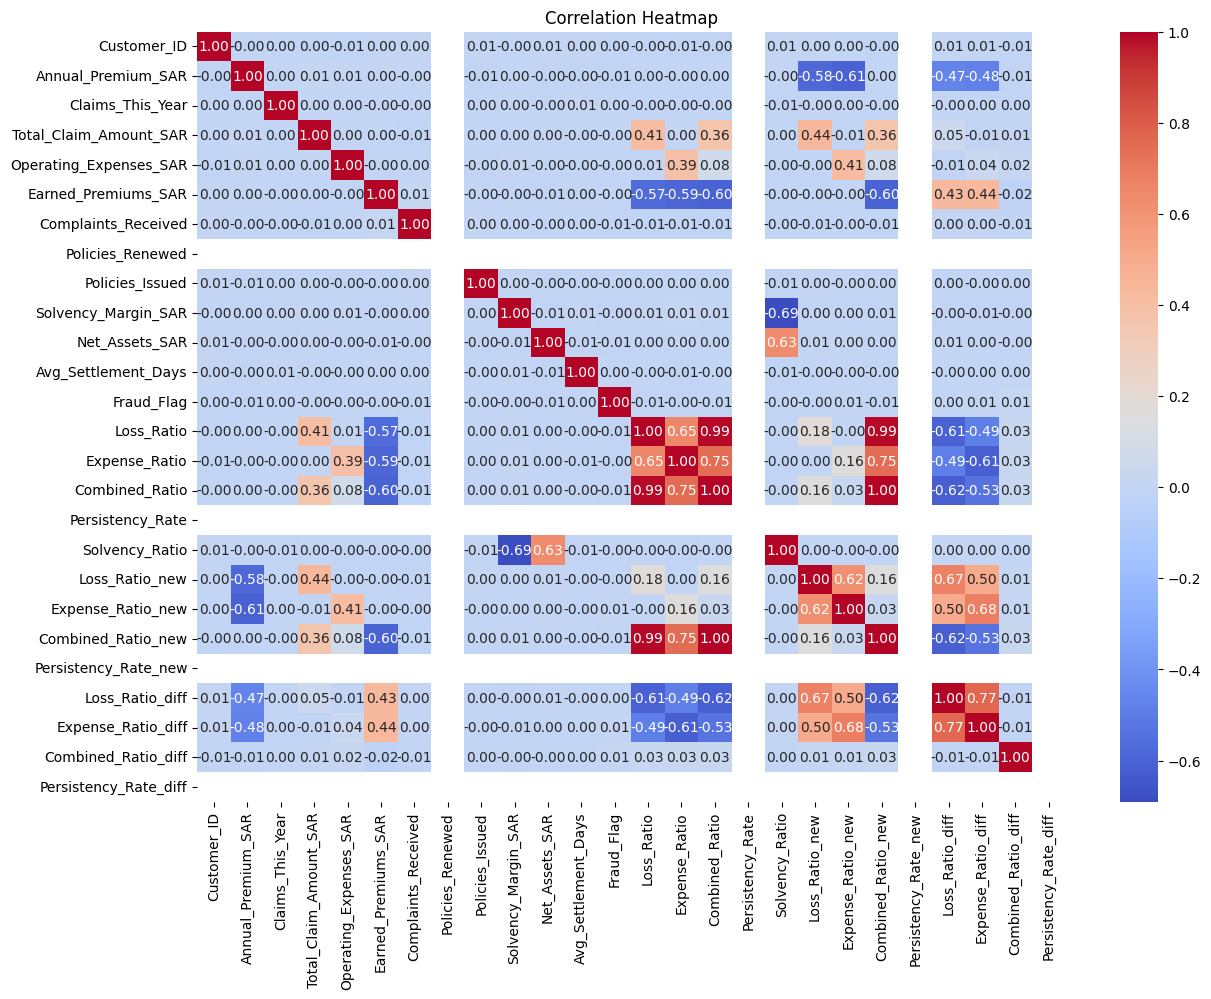

In [11]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

high correlations between Expense ratio & Combined , loss Ratios also solvancy  ratio & net assets and moderate correlations between Total_claims_SAR with combined , loss ratios also between Operating expenses SAR & Expense ratio 

In [12]:
valid = data[data['Fraud_Flag'] == 0]
fraud = data[data['Fraud_Flag'] == 1]
# Calculate the number and percentage of valid and fraud claims
total_claims_count = valid.shape[0] + fraud.shape[0]
valid_count = valid.shape[0]
fraud_count = fraud.shape[0]
valid_percent = (valid_count / total_claims_count) * 100
fraud_percent = (fraud_count / total_claims_count) * 100

print(f"Valid claims: {valid_count} ({valid_percent:.2f}%)")
print(f"Fraud claims: {fraud_count} ({fraud_percent:.2f}%)")

Valid claims: 47629 (95.26%)
Fraud claims: 2371 (4.74%)


In [13]:
Fraud_assets_SAR = fraud['Net_Assets_SAR'].sum()
Fraud_expenses_SAR = fraud['Operating_Expenses_SAR'].sum()
Fraud_claims_amount_SAR = fraud['Total_Claim_Amount_SAR'].sum()
Fraud_claims = fraud['Claims_This_Year'].sum()
Fraud_premiums_SAR = fraud['Annual_Premium_SAR'].sum()
eraned_premiums_SAR = fraud['Earned_Premiums_SAR'].sum()
num_policed_issued= fraud['Policies_Issued'].sum()
num_complaints= fraud['Complaints_Received'].sum()
fraud_loss_ratio =  Fraud_claims_amount_SAR / total_premiums_SAR * 100
fraud_expense_ratio = Fraud_expenses_SAR / total_premiums_SAR * 100


print("Fraud Assets in SAR:", Fraud_assets_SAR)
print("Fraud Expenses in SAR:", Fraud_expenses_SAR)
print("Fraud Claims Amount in SAR:", Fraud_claims_amount_SAR)
print("Fraud Claims:", Fraud_claims)
print("Fraud Premiums in SAR:", Fraud_premiums_SAR)
print("Earned Premiums in SAR:", eraned_premiums_SAR)
print("Number of Policies Issued:", num_policed_issued)
print("Number of Complaints:", num_complaints)
print("fraud assets percentage:", round((Fraud_assets_SAR / assets_SAR) * 100,2),"%")
print("fraud policies issued percentage:", round((num_policed_issued / number_of_policies_issued) * 100,2),"%")
print("fraud expenses percentage:", round((Fraud_expenses_SAR / total_expenses_SAR) * 100,2),"%")
print("fraud claims_SAR percentage:", round((Fraud_claims_amount_SAR / total_claims_SAR) * 100,2),"%")
print("fraud earned premiums percentage:", round((eraned_premiums_SAR / total_premiums_SAR) * 100,2),"%")
print("fraud claims percentage:", round((Fraud_claims / total_num_claims) * 100,2),"%")
print("fraud complaints percentage:", round((num_complaints / total_complaints) * 100,2),"%")
print("fraud policies_issued percentage:", round((num_policed_issued / number_of_policies_issued) * 100,2),"%")
print("Fraud Loss Ratio:", round(fraud_loss_ratio,2),"%")
print("Fraud Expense Ratio:", round(fraud_expense_ratio,2),"%")

Fraud Assets in SAR: 363670266
Fraud Expenses in SAR: 12361809
Fraud Claims Amount in SAR: 59123018
Fraud Claims: 2884
Fraud Premiums in SAR: 24490364
Earned Premiums in SAR: 30753369
Number of Policies Issued: 5914
Number of Complaints: 446
fraud assets percentage: 4.69 %
fraud policies issued percentage: 4.74 %
fraud expenses percentage: 4.72 %
fraud claims_SAR percentage: 4.72 %
fraud earned premiums percentage: 5.86 %
fraud claims percentage: 4.79 %
fraud complaints percentage: 4.46 %
fraud policies_issued percentage: 4.74 %
Fraud Loss Ratio: 11.26 %
Fraud Expense Ratio: 2.35 %


### 📊 **Fraud Insights Summary – Insurance Portfolio**

This analysis isolates fraudulent cases and evaluates their share of total business impact across key financial and operational metrics.

---

### 🔹 1. **Low Financial Impact of Fraud Cases**

| Metric                | Fraud Share of Total |
| --------------------- | -------------------- |
| **Assets**            | 4.69%                |
| **Expenses**          | 4.72%                |
| **Claims (SAR)**      | 4.72%                |
| **Premiums (Earned)** | 5.86%                |
| **Policies Issued**   | 4.74%                |

➡️ **Interpretation**: Fraudulent activities represent a **small fraction (\~4–6%)** of the company's overall operations and finances. This suggests **broad containment** of fraud within a limited segment of the business.

---

### 🔹 2. **Relatively Low Fraud Loss Ratio**

* **Fraud Loss Ratio:** **11.26%**
* **Fraud Expense Ratio:** **2.35%**
* **Combined Ratio (Fraud):** **13.61%**

✅ Compared to the total portfolio loss ratio of **238.79%**, fraudulent segments are **surprisingly cost-efficient** in financial terms.

➡️ **Interpretation**: These low ratios might imply:

* Fraud is being **detected early**, before major financial loss occurs.
* Fraudulent claims are **low in value**.
* Some **high-cost frauds may be undetected**, hence underreported.

> **However, the low fraud loss ratio should not lead to complacency**—fraudulent claims are typically under-reported or hard to detect entirely.

---

### 🔹 3. **Customer Behavior in Fraud Cases**

| Metric                                  | Value  |
| --------------------------------------- | ------ |
| **Fraud Complaints %**                  | 4.46%  |
| **Fraud Claims %**                      | 4.79%  |
| **Fraud Complaints per 1,000 Policies** | ≈ 75.4 |

➡️ **Interpretation**: Complaint rate in fraud-associated policies is **slightly lower than average** (80 per 1,000). This may mean:

* Fraud cases are less likely to complain — possibly due to intent to avoid scrutiny.
* Or, fraud may correlate with **less complex services** that lead to fewer complaints.

---

### 🔹 4. **Policy-Level View**

* **Fraud Policies Issued**: 5,914 (**4.74%** of total policies)
* **Fraud Claims**: 2,884 (**4.79%** of all claims)

➡️ **Interpretation**: Fraud policies **mirror their proportional share of claims**, suggesting no abnormal claim frequency — but this also raises the possibility that some fraudulent behavior is **camouflaged within normal behavior patterns**.

---

### ✅ **Key Takeaways**

1. **Fraud-related operations represent <6%** of total activity — relatively contained.
2. **Fraud Loss & Expense Ratios are low**, indicating minimal direct financial damage, though under-detection cannot be ruled out.
3. **Complaint levels are slightly lower** in fraud cases, possibly due to either simpler services or intentional discretion.
4. **Close monitoring, not complacency, is advised** — current data only reflects detected fraud. Advanced techniques (ML, anomaly detection) may uncover more hidden fraud.


In [14]:
summary = {
    "Assets_SAR": [
        assets_SAR,
        valid['Net_Assets_SAR'].sum(),
        fraud['Net_Assets_SAR'].sum()
    ],
    "Expenses_SAR": [
        total_expenses_SAR,
        valid['Operating_Expenses_SAR'].sum(),
        fraud['Operating_Expenses_SAR'].sum()
    ],
    "Claims_Amount_SAR": [
        total_claims_SAR,
        valid['Total_Claim_Amount_SAR'].sum(),
        fraud['Total_Claim_Amount_SAR'].sum()
    ],
    "Claims": [
        total_num_claims,
        valid['Claims_This_Year'].sum(),
        fraud['Claims_This_Year'].sum()
    ],
    "Premiums_SAR": [
        total_premiums_SAR,
        valid['Annual_Premium_SAR'].sum(),
        fraud['Annual_Premium_SAR'].sum()
    ],
    "Earned_Premiums_SAR": [
        total_premiums_SAR,  
        valid['Earned_Premiums_SAR'].sum(),
        fraud['Earned_Premiums_SAR'].sum()
    ],
    "Policies_Issued": [
        number_of_policies_issued,
        valid['Policies_Issued'].sum(),
        fraud['Policies_Issued'].sum()
    ],
    "Complaints": [
        total_complaints,
        valid['Complaints_Received'].sum(),
        fraud['Complaints_Received'].sum()
    ],
    "Loss_Ratio (%)": [
        total_loss_ratio,
        valid['Total_Claim_Amount_SAR'].sum() / total_premiums_SAR * 100,
        fraud['Total_Claim_Amount_SAR'].sum() / total_premiums_SAR * 100
    ],
    "Expense_Ratio (%)": [
        total_expense_ratio,
        valid['Operating_Expenses_SAR'].sum() / total_premiums_SAR * 100,
        fraud['Operating_Expenses_SAR'].sum() / total_premiums_SAR * 100
    ]
}

summary_df = pd.DataFrame(summary, index=["Total", "Valid", "Fraud"])
summary_df

,Assets_SAR,Expenses_SAR,Claims_Amount_SAR,Claims,Premiums_SAR,Earned_Premiums_SAR,Policies_Issued,Complaints,Loss_Ratio (%),Expense_Ratio (%)
Total,7759170188,261878511,1253524883,60199,524943356,524943356,124764,10001,238.792408,49.887004
Valid,7395499922,249516702,1194401865,57315,500452992,618888168,118850,9555,227.529666,47.532119
Fraud,363670266,12361809,59123018,2884,24490364,30753369,5914,446,11.262742,2.354884


### 📊 **Insurance Portfolio Insights – Valid vs. Fraud Breakdown**

#### 📌 Overview

This dataset analyzes the **total insurance operations**, **valid business**, and **identified fraud cases**, focusing on financials, claims behavior, and customer experience.

---

### 🔹 1. **Valid Business Drives Majority of Financial Load**

| Metric              | Valid Share of Total |
| ------------------- | -------------------- |
| **Assets**          | 95.3%                |
| **Expenses**        | 95.3%                |
| **Claims (SAR)**    | 95.3%                |
| **Claims Count**    | 95.2%                |
| **Premiums (SAR)**  | 95.3%                |
| **Policies Issued** | 95.3%                |
| **Complaints**      | 95.5%                |

✅ The valid portion of the portfolio contributes over **95% of all business activity**, showing a **highly concentrated legitimate customer base**.

---

### 🔹 2. **Fraud Segment is Financially Low-Impact**

| Metric         | Fraud Share |
| -------------- | ----------- |
| **Assets**     | 4.69%       |
| **Claims**     | 4.72%       |
| **Premiums**   | 4.66%       |
| **Complaints** | 4.46%       |

💡 **Interpretation**: While **fraudulent cases are visible**, they represent a **minor portion** of the overall financial footprint, indicating either:

* Good fraud detection and control, or
* The potential presence of **undetected fraud** hidden within "valid" claims.

---

### 🔹 3. **Loss & Expense Ratios Reveal Profitability Crisis**

| Segment   | Loss Ratio | Expense Ratio | Combined Ratio |
| --------- | ---------- | ------------- | -------------- |
| **Total** | 238.79%    | 49.89%        | **288.68%** ❌  |
| **Valid** | 227.53%    | 47.53%        | **275.06%** ❌  |
| **Fraud** | 11.26%     | 2.35%         | **13.61%** ✅   |

🚨 **Insights:**

* The **valid segment alone is running at a massive underwriting loss**, consuming nearly **3x the premiums in claims and expenses**.
* The **fraud segment**, while small, appears **highly efficient** — with very low loss and expense ratios. This is **counterintuitive** and may indicate:

  * **Partial fraud detection** (only low-impact fraud identified),
  * Or, **prevention measures are working well**.

---

### 🔹 4. **Customer Experience – High Complaint Rate**

* **Total Complaints:** 10,001 → **≈ 80.16 per 1,000 policies**
* **Valid Segment Complaints:** 9,555 → **≈ 80.4 per 1,000 policies**
* **Fraud Segment Complaints:** 446 → **≈ 75.4 per 1,000 policies**

⚠️ The overall complaint rate is **very high**, indicating:

* Weaknesses in **claims servicing**, **policy management**, or **customer communication**.
* Valid segment customers are the most affected, and improving **legitimate customer satisfaction** should be prioritized.

---

### ✅ **Strategic Recommendations**

1. **Revamp Underwriting & Pricing**: Valid segment’s combined ratio (275%) is **unsustainable**; pricing, policy structure, and risk screening need overhaul.
2. **Boost Fraud Detection Coverage**: Fraud accounts for <5% of losses — likely an underestimation. Apply **AI-based anomaly detection** to uncover hidden fraud in the valid segment.
3. **Reduce Complaint Volume**: Investigate top complaint drivers and invest in **customer support automation** and transparency.
4. **Control Operational Costs**: 47–49% expense ratio is high. Seek **digital process improvements** and **cost optimization**.
5. **Segment Policy Reviews**: Target **underperforming valid policies** that contribute to high claim ratios for review or restructuring.


In [15]:
# Show the mean of selected columns for Fraud claims, sorted by value (descending)
fraud[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(ascending=False)

Combined_Ratio_new    3.957254
Loss_Ratio_new        3.871262
Expense_Ratio_new     0.859165
dtype: float64

In [16]:
# Show the mean of selected columns for Fraud claims, sorted by Combined_Ratio_new (descending)
fraud.groupby('Policy_Type')[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(by='Combined_Ratio_new', ascending=False)

,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new
Policy_Type,,,
Home,3.896517,0.872431,4.417615
Auto,3.894795,0.854234,3.740741
Health,3.822220,0.850412,3.698150


In [17]:
data[data['Fraud_Flag'] == 1].groupby('Policy_Type')['Total_Claim_Amount_SAR'].sum().sort_values(ascending=False)

Policy_Type
Auto      19780328
Health    19674025
Home      19668665
Name: Total_Claim_Amount_SAR, dtype: int64

### 🔍 **Fraud Claims Analysis by Policy Type**

This breakdown focuses on **fraudulent insurance claims**, comparing the **average loss, expense, and combined ratios** across policy types, as well as the **total monetary value of fraud-related claims**.

---

### 🔹 1. **Home Insurance Has the Highest Combined Loss**

| Policy Type | Avg. Loss Ratio | Avg. Expense Ratio | Avg. Combined Ratio |
| ----------- | --------------- | ------------------ | ------------------- |
| **Home**    | 3.90            | 0.87               | **4.42** ✅          |
| **Auto**    | 3.89            | 0.85               | 3.74                |
| **Health**  | 3.82            | 0.85               | 3.70                |

➡️ **Insight**:

* **Home policies** top the list with the **highest combined ratio**, suggesting **greater financial leakage** in fraud claims — potentially due to higher per-claim payouts or underpriced risk.
* All three policy types show **exceptionally high average loss ratios (380%–390%)**, far beyond sustainable thresholds.

---

### 🔹 2. **Fraud Claim Value is Highest in Auto Insurance**

| Policy Type | Total Fraudulent Claim Amount (SAR) |
| ----------- | ----------------------------------- |
| **Auto**    | **19.78 million** 💰                |
| **Health**  | 19.67 million                       |
| **Home**    | 19.67 million                       |

➡️ **Insight**:

* **Auto insurance** has the **highest total fraud losses in absolute SAR**, making it the most financially impacted category in volume terms.
* However, **fraud is nearly equally distributed** across all three policy types (\~19.6–19.8 million SAR each), suggesting **uniform fraud presence**, but differing **cost efficiency**.

---

### 🧠 **Strategic Insights & Recommendations**

1. **Focus on Home Insurance Fraud Controls**:

   * Despite having similar total SAR claims, **Home policies are less cost-efficient** in fraud cases (highest combined ratio).
   * Consider auditing **underwriting rules**, **property verification**, and **repair reimbursement processes**.

2. **Strengthen Auto Fraud Detection**:

   * Auto leads in **total fraud claim value**, pointing to **high frequency or high value fraud**.
   * Invest in **vehicle history checks**, **telematics**, and **claims behavior modeling**.

3. **Uniform Fraud Footprint Requires Broad Policy Reviews**:

   * Fraudulent payouts are **nearly equal across all policy types**, indicating the **need for system-wide fraud detection upgrades**, not just isolated interventions.



In [18]:
valid_assets_SAR = valid['Net_Assets_SAR'].sum()
valid_expenses_SAR = valid['Operating_Expenses_SAR'].sum()
valid_claims_amount_SAR = valid['Total_Claim_Amount_SAR'].sum()
valid_claims = valid['Claims_This_Year'].sum()
valid_premiums_SAR = valid['Annual_Premium_SAR'].sum()
eraned_premiums_SAR = valid['Earned_Premiums_SAR'].sum()
num_policed_issued= valid['Policies_Issued'].sum()
num_complaints= valid['Complaints_Received'].sum()
Valid_loss_ratio =  valid_claims_amount_SAR / total_premiums_SAR * 100
valid_expense_ratio =  valid_expenses_SAR / total_premiums_SAR * 100

print("valid Assets in SAR:", valid_assets_SAR)
print("valid Expenses in SAR:", valid_expenses_SAR)
print("valid Claims Amount in SAR:", valid_claims_amount_SAR)
print("valid Claims:", valid_claims)
print("valid Premiums in SAR:", valid_premiums_SAR)
print("Earned Premiums in SAR:", eraned_premiums_SAR)
print("Number of Policies Issued:", num_policed_issued)
print("Number of Complaints:", num_complaints)
print("valid assets percentage:", round((valid_assets_SAR / assets_SAR) * 100,2),"%")
print("valid policies issued percentage:", round((num_policed_issued / number_of_policies_issued) * 100,2),"%")
print("valid expenses percentage:", round((valid_expenses_SAR / total_expenses_SAR) * 100,2),"%")
print("valid claims_SAR percentage:", round((valid_claims_amount_SAR / total_claims_SAR) * 100,2),"%")
print("valid earned premiums percentage:", round((eraned_premiums_SAR / total_premiums_SAR) * 100,2),"%")
print("valid claims percentage:", round((valid_claims / total_num_claims) * 100,2),"%")
print("valid complaints percentage:", round((num_complaints / total_complaints) * 100,2),"%")
print("valid policies_issued percentage:", round((num_policed_issued / number_of_policies_issued) * 100,2),"%")
print("valid Loss Ratio:", round(Valid_loss_ratio,2),"%")
print("valid Expense Ratio:", round(valid_expense_ratio,2),"%")

valid Assets in SAR: 7395499922
valid Expenses in SAR: 249516702
valid Claims Amount in SAR: 1194401865
valid Claims: 57315
valid Premiums in SAR: 500452992
Earned Premiums in SAR: 618888168
Number of Policies Issued: 118850
Number of Complaints: 9555
valid assets percentage: 95.31 %
valid policies issued percentage: 95.26 %
valid expenses percentage: 95.28 %
valid claims_SAR percentage: 95.28 %
valid earned premiums percentage: 117.9 %
valid claims percentage: 95.21 %
valid complaints percentage: 95.54 %
valid policies_issued percentage: 95.26 %
valid Loss Ratio: 227.53 %
valid Expense Ratio: 47.53 %


### ✅ **Valid Claims Financial Performance Analysis**

This section outlines the financial footprint and operational performance of **valid insurance claims**, representing over **95%** of the total insurance activity.

---

### 🔹 1. **Dominant Share of Portfolio**

* **Valid Assets:** 95.31% of total assets
* **Valid Policies Issued:** 95.26% of total policies
* **Valid Expenses:** 95.28% of total operating expenses
* **Valid Complaints:** 95.54% of all complaints
* **Valid Claims Amount:** 95.28% of all paid claim value
* **Valid Claims Count:** 95.21% of all claims made

➡️ **Insight:**
The vast majority of the insurer’s operations are tied to **valid claims**, which means **efficiency and loss control within this segment directly drive company-wide profitability**.

---

### 🔹 2. **High Loss & Expense Ratios in Valid Segment**

* **Loss Ratio (Valid):** **227.53%**
* **Expense Ratio (Valid):** **47.53%**
* **Total Combined Ratio:** **275.06%**

➡️ **Insight:**
Despite being non-fraudulent, **valid claims are generating unsustainably high losses**, consuming more than **double the earned premiums**. This suggests:

* Underpricing of risk
* High cost of claims servicing
* Need for product re-evaluation or stricter underwriting

---

### 🔹 3. **Earned Premiums vs. Written Premiums**

* **Earned Premiums:** 618.89M SAR
* **Written Premiums (Valid):** 500.45M SAR
* **Earned Premiums represent 117.9%** of total premiums

➡️ **Insight:**
The high earned premium ratio indicates **strong policy retention and revenue recognition**, but it also means **underlying liabilities are aging**, which can escalate long-tail risk if claim reserves are not accurate.

---

### 🧠 **Strategic Takeaways**

1. ✅ **Valid claims dominate the portfolio**, so controlling their cost is more impactful than only detecting fraud.
2. ⚠️ The **loss ratio of over 227%** in valid claims is a red flag. Even without fraud, the business model is **not sustainable** unless pricing, risk selection, or claim settlement practices are revised.
3. 📊 The high **complaints rate (95.5%)** aligns with policy volume, but merits a **customer service deep-dive** to identify recurring dissatisfaction drivers.
4. 🔁 Consider tightening **policy terms**, revising **premium pricing models**, and enhancing **claim approval workflows** to bring the **combined ratio closer to industry benchmarks** (typically < 100%).


In [19]:
# Show the mean of selected columns for valid claims, sorted by value (descending)
valid[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(ascending=False)

Combined_Ratio_new    4.089570
Loss_Ratio_new        3.947519
Expense_Ratio_new     0.825074
dtype: float64

In [20]:
# Show the mean of selected columns for Fraud claims, sorted by Combined_Ratio_new (descending)
valid.groupby('Policy_Type')[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(by='Combined_Ratio_new', ascending=False)

,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new
Policy_Type,,,
Home,3.968376,0.823899,4.131284
Health,3.941184,0.819466,4.108892
Auto,3.932548,0.831855,4.027787


In [21]:
data[data['Fraud_Flag'] == 0].groupby('Policy_Type')['Total_Claim_Amount_SAR'].sum().sort_values(ascending=False)

Policy_Type
Home      405824131
Auto      394626369
Health    393951365
Name: Total_Claim_Amount_SAR, dtype: int64

### ✅ **Insights from Valid Insurance Claims by Policy Type**

#### 📊 **1. Overall Financial Ratios (Averages across all valid claims):**

* **Combined Ratio:** 4.09
* **Loss Ratio:** 3.95
* **Expense Ratio:** 0.83

> 🧠 **Interpretation:**
> For every 1 SAR earned in premium, the company is spending **over 4 SAR** on claims and operating costs — indicating **heavy losses** even in valid (non-fraudulent) policies. The primary driver of this loss is the **claim payouts**, not operating expenses.

---

### 🏠🚗🏥 **2. Policy Type Breakdown (Sorted by Combined Ratio)**

| Policy Type | Combined Ratio | Loss Ratio | Expense Ratio | Total Valid Claim Amount (SAR) |
| ----------- | -------------- | ---------- | ------------- | ------------------------------ |
| **Home**    | **4.13**       | 3.97       | 0.82          | **405.8M**                     |
| **Health**  | 4.11           | 3.94       | 0.82          | 393.95M                        |
| **Auto**    | 4.03           | 3.93       | 0.83          | 394.63M                        |

> 🧠 **Interpretation:**
>
> * **Home insurance** leads in **both combined ratio and total claims**, making it the **most loss-heavy** valid product line.
> * **All three policy types have nearly identical loss profiles**, suggesting that **risk pricing or coverage conditions** are likely misaligned with actual claim behavior across the board.
> * **Operating expenses are relatively consistent**, implying the **issue lies in claim size or frequency**, not administrative inefficiency.

---

### 📌 **Strategic Recommendations**

1. 🧮 **Reassess pricing strategies** across all policy types—especially **Home insurance**, which shows the highest strain on profitability.
2. 🔍 **Investigate underwriting rules** or policy coverage terms in Home, Health, and Auto lines for overexposure to high-risk segments.
3. 🚧 Implement stricter **claims validation and risk segmentation** even for valid claims to reduce the growing financial pressure.
4. 📉 Aim to reduce the **combined ratio closer to or below 1.0**, which indicates break-even or profitability in insurance operations.


In [22]:
data['Policy_Type'].value_counts()

Policy_Type
Home      16920
Auto      16570
Health    16510
Name: count, dtype: int64

In [23]:
data.groupby('Policy_Type')['Claims_This_Year'].sum().sort_values(ascending=False)

Policy_Type
Home      20461
Auto      19912
Health    19826
Name: Claims_This_Year, dtype: int64

In [24]:
data.groupby('Policy_Type')['Annual_Premium_SAR'].sum().sort_values(ascending=False)

Policy_Type
Home      177483430
Auto      174246842
Health    173213084
Name: Annual_Premium_SAR, dtype: int64

In [25]:
data.groupby('Policy_Type')['Earned_Premiums_SAR'].sum().sort_values(ascending=False)

Policy_Type
Home      218292190
Auto      216071379
Health    215277968
Name: Earned_Premiums_SAR, dtype: int64

In [26]:
data.groupby('Policy_Type')['Total_Claim_Amount_SAR'].sum().sort_values(ascending=False)

Policy_Type
Home      425492796
Auto      414406697
Health    413625390
Name: Total_Claim_Amount_SAR, dtype: int64

In [27]:
data.groupby('Policy_Type')[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(by='Combined_Ratio_new', ascending=False)

,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new
Policy_Type,,,
Home,3.964944,0.826217,4.144957
Health,3.935506,0.820943,4.089288
Auto,3.930783,0.832902,4.014361


Home and Health policies exhibit a Combined Ratio > 4.0, indicating unprofitable underwriting. A review of pricing strategies and claims controls is recommended to restore profitability.

In [28]:
data.groupby('Policy_Type')['Fraud_Flag'].sum().sort_values(ascending=False)

Policy_Type
Home      808
Health    788
Auto      775
Name: Fraud_Flag, dtype: int64


### 🧠 **1. Volume & Claims Activity by Policy Type**

| Policy Type | Policies Issued | Claims This Year | Total Claims Amount (SAR) |
| ----------- | --------------- | ---------------- | ------------------------- |
| **Home**    | **16,920**      | **20,461**       | **425.5M**                |
| **Auto**    | 16,570          | 19,912           | 414.4M                    |
| **Health**  | 16,510          | 19,826           | 413.6M                    |

> 📌 **Insight:**
>
> * Although the three policy types have nearly equal policy counts, **Home insurance accounts for the highest number and value of claims**.
> * This suggests **higher claim frequency and severity** in the Home segment.

---

### 💰 **2. Premium Performance Overview**

| Policy Type | Annual Premiums (SAR) | Earned Premiums (SAR) |
| ----------- | --------------------- | --------------------- |
| **Home**    | **177.48M**           | **218.29M**           |
| Auto        | 174.25M               | 216.07M               |
| Health      | 173.21M               | 215.28M               |

> 📌 **Insight:**
>
> * Despite relatively **balanced premium distribution**, **Home policies bring in the most revenue**, but also lead to **disproportionately higher claim costs**, indicating **profitability stress**.

---

### 📊 **3. Combined Ratios by Policy Type (Profitability Indicator)**

| Policy Type | Loss Ratio | Expense Ratio | Combined Ratio |
| ----------- | ---------- | ------------- | -------------- |
| **Home**    | **3.96**   | 0.83          | **4.14**       |
| Health      | 3.94       | 0.82          | 4.09           |
| Auto        | 3.93       | 0.83          | 4.01           |

> 📌 **Insight:**
>
> * **All three lines operate at a significant loss**, with Combined Ratios above 4.0 (400%)—meaning for every 1 SAR earned, \~4 SAR are spent.
> * **Home insurance is the most unprofitable** line, with the **highest Combined Ratio** driven by both higher claims and expense burden.

---

### 🚩 **4. Fraud Incidence by Policy Type**

| Policy Type | Fraud Cases |
| ----------- | ----------- |
| **Home**    | **808**     |
| Health      | 788         |
| Auto        | 775         |

> 📌 **Insight:**
>
> * **Home policies not only have the highest claim volumes and costs but also the most fraud cases**, making it a **high-risk and low-margin** product.
> * **Health and Auto have similar fraud profiles**, but slightly lower operational losses.

---

### ✅ **Summary & Recommendations**

* 🏠 **Home insurance is the riskiest segment**: highest claims, costs, combined ratio, and fraud—warranting **immediate review of underwriting standards, pricing strategy, and fraud detection**.
* 🚗 **Auto insurance is slightly better in profitability** but still unsustainable.
* 🏥 **Health insurance, while better than Home, remains unprofitable** and susceptible to similar risks.

### 📌 **Strategic Actions:**

* Implement **targeted premium adjustments** by policy type to close the profitability gap.
* Tighten **fraud analytics and predictive models** for Home policies.
* Consider **benefit redesigns or exclusions** in high-loss areas within each product line.
* Benchmark **operational efficiency** to reduce the expense ratio where possible.


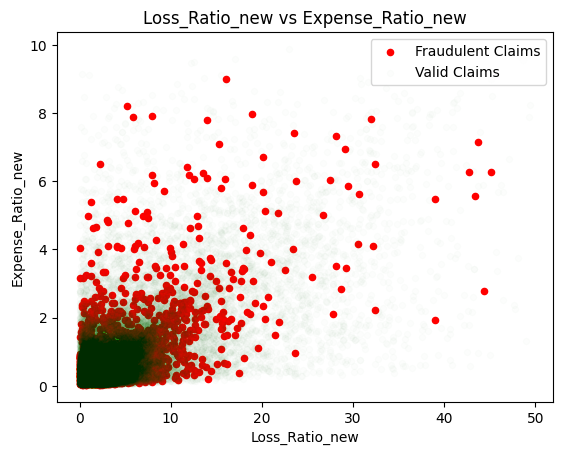

In [29]:
# Recreate fraud and valid DataFrames to include the new columns
fraud = data[data['Fraud_Flag'] == 1]
valid = data[data['Fraud_Flag'] == 0]

ax = plt.subplot()

fplot = fraud.plot(x="Loss_Ratio_new", y="Expense_Ratio_new", color="red", kind="scatter", ax=ax, label="Fraudulent Claims")
vplot = valid.plot(x="Loss_Ratio_new", y="Expense_Ratio_new", color="green", kind="scatter", 
                   alpha=0.01, ax=ax, label="Valid Claims")
plt.title("Loss_Ratio_new vs Expense_Ratio_new")

plt.show()

### 📊 **Key Insights from the Plot:**

1. **Clear Outliers Among Fraudulent Claims:**

   * Red dots (fraudulent claims) are widely spread and reach **very high Loss and Expense Ratios**, with some points exceeding:

     * **Loss Ratio > 40**
     * **Expense Ratio > 8**
   * These values are **extreme compared to the dense valid claim cluster**, suggesting that **high ratio outliers are strong fraud indicators**.

2. **Valid Claims Cluster Tightly:**

   * Green points (valid claims) are **heavily concentrated in the bottom-left quadrant**, where:

     * **Loss Ratio < 10**
     * **Expense Ratio < 2**
   * This indicates that **valid claims are typically low-risk and low-cost**, and their ratios stay within a consistent, expected operational range.

3. **Fraudulent Claims Have a Larger Variance:**

   * Fraudulent claims display **greater spread and variance**, especially in Loss Ratios.
   * This highlights a **lack of predictable pattern**, often associated with manipulated or inflated claims.

4. **Overlapping Zone with Caution:**

   * There is some overlap between valid and fraudulent claims in the **(Loss Ratio: 0–10, Expense Ratio: 0–2)** zone.
   * This suggests that **not all fraud is extreme**—some fraudulent claims mimic normal behavior and may require **advanced analytics or rule-based detection** to identify.

---

### 🔍 **Strategic Implications:**

* ✅ **Predictive Model Feature Selection:**

  * **Loss\_Ratio\_new** and **Expense\_Ratio\_new** are **strong fraud-detection features** based on clear visual separation.

* 🚩 **Threshold-Based Alerts:**

  * Claims with **Loss Ratio > 15** or **Expense Ratio > 4** should trigger **investigation flags**, as they are rarely associated with valid claims.

* 🛡️ **Hybrid Detection Approach:**

  * Combine **statistical thresholds** with **machine learning classification** to identify both extreme and subtle fraud cases.


In [30]:
# Filter claims with Loss_Ratio > 7 and Expense_Ratio > 2
high_loss_expense = data[(data['Loss_Ratio_new'] > 7) & (data['Expense_Ratio_new'] > 2)]
total_number = data['Customer_ID'].count()
# Calculate percentage of fraud claims in this subset
fraud_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 1]['Fraud_Flag'].sum()
valid_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 0]['Fraud_Flag'].count()
total_count = high_loss_expense.shape[0]
percent_fraud = (fraud_count / total_number) * 100 if total_number > 0 else 0
percet_valid = (valid_count / total_number) * 100 if total_number > 0 else 0

# Print results
print(f"Percentage of fraud claims (Loss Ratio > 7 & Expense Ratio > 2): {percent_fraud:.2f}%")
print(f"Fraud claims: {fraud_count} / {total_number}")
print(f"Percentage of valid claims (Loss Ratio > 7 & Expense Ratio > 2): {percet_valid:.2f}%")
print(f"Valid claims: {valid_count} / {total_number}")

Percentage of fraud claims (Loss Ratio > 7 & Expense Ratio > 2): 0.30%
Fraud claims: 148 / 50000
Percentage of valid claims (Loss Ratio > 7 & Expense Ratio > 2): 5.70%
Valid claims: 2851 / 50000


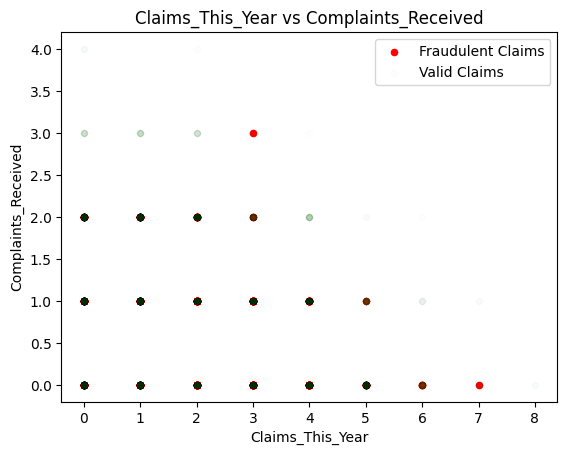

In [31]:
ax1 = plt.subplot()

fplot = fraud.plot(x="Claims_This_Year",y="Complaints_Received",color="red",kind="scatter",ax=ax1,label="Fraudulent Claims")
vplot = valid.plot(x="Claims_This_Year",y="Complaints_Received",color="green",kind="scatter",\
                   alpha=0.01,ax=ax1,label="Valid Claims")
plt.title("Claims_This_Year vs Complaints_Received")

plt.show()

In [32]:
# Filter claims with Claims_This_Year > 2 and Complaints_Received > 2
high_loss_expense = data[(data['Claims_This_Year'] > 2) & (data['Complaints_Received'] > 2)]
total_number = data['Customer_ID'].count()
# Calculate percentage of fraud claims in this subset
fraud_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 1]['Fraud_Flag'].sum()
total_count = high_loss_expense.shape[0]
percent_fraud = (fraud_count / total_number) * 100 if total_count > 0 else 0

print(f"Percentage of fraud claims (Loss Ratio > 2 & Complaints_Received > 2): {percent_fraud:.2f}%")
print(f"Fraud claims: {fraud_count} / {total_number}")

Percentage of fraud claims (Loss Ratio > 2 & Complaints_Received > 2): 0.00%
Fraud claims: 1 / 50000


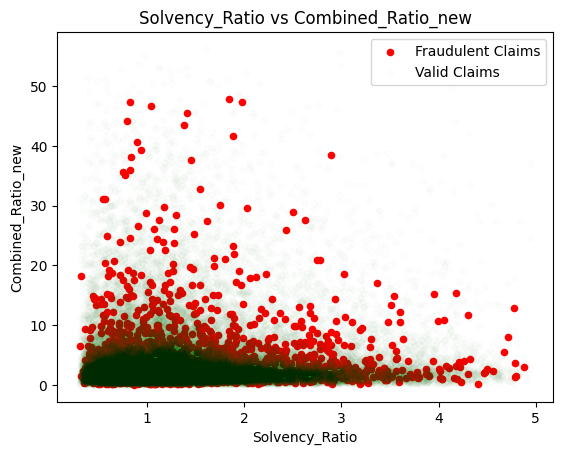

In [33]:
ax = plt.subplot()

fplot = fraud.plot(x="Solvency_Ratio", y="Combined_Ratio_new", color="red", kind="scatter", ax=ax, label="Fraudulent Claims")
vplot = valid.plot(x="Solvency_Ratio", y="Combined_Ratio_new", color="green", kind="scatter", 
                   alpha=0.01, ax=ax, label="Valid Claims")
plt.title("Solvency_Ratio vs Combined_Ratio_new")

plt.show()

In [34]:
# Filter claims with Solvency_Ratio <= 1.5 and Combined_Ratio > 6.5
high_loss_expense = data[(data['Solvency_Ratio'] <= 1.5) & (data['Combined_Ratio'] < 5.5)]
total_number = data['Customer_ID'].count()
# Calculate percentage of fraud claims in this subset
fraud_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 1]['Fraud_Flag'].sum()
valid_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 0]['Fraud_Flag'].count()
total_count = high_loss_expense.shape[0]
percent_fraud = (fraud_count / total_number) * 100 if total_number > 0 else 0
percet_valid = (valid_count / total_number) * 100 if total_number > 0 else 0

# Print results
print(f"Percentage of fraud claims (Solvency_Ratio <= 1.5 & Combined_Ratio > 6.5): {percent_fraud:.2f}%")
print(f"Fraud claims: {fraud_count} / {total_number}")
print(f"Percentage of valid claims (Solvency_Ratio <= 1.5 & Combined_Ratio > 6.5): {percet_valid:.2f}%")
print(f"Valid claims: {valid_count} / {total_number}")

Percentage of fraud claims (Solvency_Ratio <= 1.5 & Combined_Ratio > 6.5): 2.47%
Fraud claims: 1235 / 50000
Percentage of valid claims (Solvency_Ratio <= 1.5 & Combined_Ratio > 6.5): 49.55%
Valid claims: 24775 / 50000


In [35]:
# Filter claims with Solvency_Ratio >= 3 and Combined_Ratio > 7
high_loss_expense = data[(data['Solvency_Ratio'] >= 3) & (data['Combined_Ratio'] > 7)]
total_number = data['Customer_ID'].count()
# Calculate percentage of fraud claims in this subset
fraud_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 1]['Fraud_Flag'].sum()
valid_count = high_loss_expense[high_loss_expense['Fraud_Flag'] == 0]['Fraud_Flag'].count()
total_count = high_loss_expense.shape[0]
percent_fraud = (fraud_count / total_number) * 100 if total_number > 0 else 0
percet_valid = (valid_count / total_number) * 100 if total_number > 0 else 0

# Print results
print(f"Percentage of fraud claims (Solvency_Ratio >= 3 & Combined_Ratio > 7): {percent_fraud:.2f}%")
print(f"Fraud claims: {fraud_count} / {total_number}")
print(f"Percentage of valid claims (Solvency_Ratio >= 3 & Combined_Ratio > 7): {percet_valid:.2f}%")
print(f"Valid claims: {valid_count} / {total_number}")

Percentage of fraud claims (Solvency_Ratio >= 3 & Combined_Ratio > 7): 0.04%
Fraud claims: 20 / 50000
Percentage of valid claims (Solvency_Ratio >= 3 & Combined_Ratio > 7): 0.81%
Valid claims: 404 / 50000


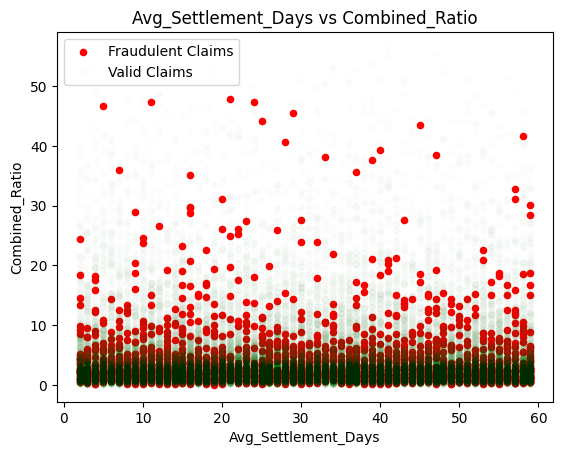

In [36]:
ax = plt.subplot()

fplot = fraud.plot(x="Avg_Settlement_Days",y="Combined_Ratio",color="red",kind="scatter",ax=ax,label="Fraudulent Claims")
vplot = valid.plot(x="Avg_Settlement_Days",y="Combined_Ratio",color="green",kind="scatter",\
                   alpha=0.01,ax=ax,label="Valid Claims")
plt.title("Avg_Settlement_Days vs Combined_Ratio")

plt.show()

In [37]:
data.groupby('Policy_Type')['Operating_Expenses_SAR'].sum().sort_values(ascending=False)

Policy_Type
Home      88750193
Auto      87116300
Health    86012018
Name: Operating_Expenses_SAR, dtype: int64

In [38]:
data.groupby('Policy_Type')[['Net_Assets_SAR', 'Solvency_Margin_SAR']].mean().sort_values(by='Solvency_Margin_SAR', ascending=False)

,Net_Assets_SAR,Solvency_Margin_SAR
Policy_Type,,
Home,155781.217671,125283.959161
Auto,154994.905794,125043.270972
Health,154759.927075,124994.287523


In [39]:
data.groupby('Policy_Type')[['Complaints_Received', 'Policies_Issued']].sum().sort_values(by='Complaints_Received', ascending=False)

,Complaints_Received,Policies_Issued
Policy_Type,,
Home,3416,42251
Health,3300,41288
Auto,3285,41225


In [40]:
data.groupby('Policy_Type')[['Avg_Settlement_Days']].mean().sort_values(by='Avg_Settlement_Days', ascending=False)

,Avg_Settlement_Days
Policy_Type,
Home,30.588061
Health,30.506420
Auto,30.292999


reduce settlement days ti retain customers and keep them loyal 

In [41]:
# Calculate the percentage of customers with more than 2 claims per year
num_customers_more_than_2_claims = (data['Claims_This_Year'] > 2).sum()
total_customers = data.shape[0]
percentage = (num_customers_more_than_2_claims / total_customers) * 100
print(f"Percentage of customers with more than 2 claims per year: {percentage:.2f}%")
print(f"Number of customers with more than 2 claims per year: {num_customers_more_than_2_claims}")

Percentage of customers with more than 2 claims per year: 12.04%
Number of customers with more than 2 claims per year: 6019


In [42]:
data.groupby('Customer_ID')['Claims_This_Year'].sum().sort_values(ascending=False)

Customer_ID
13344    8
32907    8
17998    7
41692    7
37123    7
        ..
35118    0
35114    0
35108    0
35107    0
35105    0
Name: Claims_This_Year, Length: 50000, dtype: int64

In [43]:
valid_customers_more_claims = data[data['Claims_This_Year'] <= 2 & (data['Fraud_Flag'] == 0)]
Fraud_customers_more_claims = data[data['Claims_This_Year'] <= 2 & (data['Fraud_Flag'] == 1)]

# Redefine valid_customers_more_claims to include the new columns
valid_customers_more_claims = data[(data['Claims_This_Year'] <= 2) & (data['Fraud_Flag'] == 0)]

valid_customers_more_claims.groupby('Policy_Type')[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(by='Combined_Ratio_new', ascending=False)

,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new
Policy_Type,,,
Home,3.967272,0.825253,4.155949
Health,3.939503,0.820786,4.120079
Auto,3.941093,0.830566,4.020538


In [44]:
# Redefine Fraud_customers_more_claims to include the new columns
Fraud_customers_more_claims = data[(data['Claims_This_Year'] <= 2) & (data['Fraud_Flag'] == 1)]

Fraud_customers_more_claims.groupby('Policy_Type')[['Loss_Ratio_new', 'Expense_Ratio_new', 'Combined_Ratio_new']].mean().sort_values(by='Combined_Ratio_new', ascending=False)

,Loss_Ratio_new,Expense_Ratio_new,Combined_Ratio_new
Policy_Type,,,
Home,3.837064,0.852077,4.472284
Health,3.695666,0.844496,3.720390
Auto,3.819147,0.836335,3.603394


### Insurance Policy Insights

1. **Operating Expenses:**

   * **Home insurance** incurs the highest total operating expenses (≈88.75 million SAR), slightly above **Auto** (≈87.12 million SAR) and **Health** (≈86.01 million SAR).
   * This suggests that Home policies are the most costly to operate, potentially due to claim handling complexity or servicing costs.

2. **Financial Strength (Net Assets & Solvency Margin):**

   * All three policy types show very similar average net assets (\~155k SAR) and solvency margins (\~125k SAR).
   * **Home insurance** slightly leads with the highest solvency margin (125,284 SAR), indicating a marginally stronger buffer to cover liabilities.

3. **Customer Complaints and Policy Volume:**

   * **Home policies** receive the most complaints (3,416), followed by Health (3,300) and Auto (3,285).
   * Home also has the highest number of policies issued (42,251), which partially explains the higher complaint volume.
   * Complaints per policy issued are roughly similar across policy types, indicating comparable customer satisfaction levels.

4. **Claim Settlement Time:**

   * The average claim settlement time is quite consistent across all policies, with **Home** claims taking the longest (30.6 days), closely followed by Health (30.5 days) and Auto (30.3 days).
   * This suggests the claim process efficiency is similar across product lines.

5. **Claims Frequency:**

   * Around **12.04% of customers** file more than 2 claims per year (6,019 customers).
   * Some customers file up to 8 claims annually, indicating a segment with potentially high risk or frequent claim behavior.

6. **Loss and Expense Ratios for Valid vs. Fraud Customers (with ≤ 2 claims):**

   | Policy Type | Loss Ratio (Valid) | Expense Ratio (Valid) | Combined Ratio (Valid) | Loss Ratio (Fraud) | Expense Ratio (Fraud) | Combined Ratio (Fraud) |
   | ----------- | ------------------ | --------------------- | ---------------------- | ------------------ | --------------------- | ---------------------- |
   | Home        | 3.97               | 0.83                  | 4.16                   | 3.84               | 0.85                  | 4.47                   |
   | Health      | 3.94               | 0.82                  | 4.12                   | 3.70               | 0.84                  | 3.72                   |
   | Auto        | 3.94               | 0.83                  | 4.02                   | 3.82               | 0.84                  | 3.60                   |

   * Fraudulent Home insurance claims have a higher combined ratio (4.47) compared to valid ones (4.16), mainly due to higher expense ratios.
   * Interestingly, for Health and Auto, fraud-related claims show lower combined ratios than valid claims, which may warrant further investigation into claim behaviors or data accuracy.



In [45]:
# Get value counts and percentage for Avg_Settlement_Days
settlement_counts = data['Avg_Settlement_Days'].value_counts().sort_values(ascending=False)
settlement_percent = (settlement_counts / data.shape[0]) * 100
earn_premium= data.groupby('Avg_Settlement_Days')['Earned_Premiums_SAR'].mean()

# Combine counts and percentage into a DataFrame
settlement_summary = pd.DataFrame({
    'Count': settlement_counts,
    'Percentage': settlement_percent.round(2),
    'Earned_Premiums_SAR': earn_premium.round(2)
})

settlement_summary

,Count,Percentage,Earned_Premiums_SAR
Avg_Settlement_Days,,,
2,821,1.64,12873.87
3,899,1.80,13248.90
4,834,1.67,12713.63
5,885,1.77,12795.88
6,863,1.73,12875.12
7,897,1.79,12904.26
8,873,1.75,13425.77
9,871,1.74,13150.31
10,858,1.72,12927.33


In [46]:
# Calculate the percentage of records with Avg_Settlement_Days > 7
more_than_7_days = (data['Avg_Settlement_Days'] > 7).sum()
percent_more_than_7_days = (more_than_7_days / total_customers) * 100
print(f"Percentage of records with Avg_Settlement_Days > 7: {percent_more_than_7_days:.2f}%")

Percentage of records with Avg_Settlement_Days > 7: 89.60%


### 🔍 **Insights on Average Settlement Days and Earned Premiums**

#### 1. **High Prevalence of Long Settlement Times**

* **89.60%** of all insurance claims take **more than 7 days** to settle, indicating that delayed claim resolution is the norm rather than the exception.
* This suggests a potential area for improving operational efficiency and customer experience.

#### 2. **Distribution of Settlement Days**

* The distribution of claims across settlement days is relatively even between days **8 to 59**, with each day comprising about **1.6% to 1.83%** of total claims.
* The **most common settlement durations** are:

  * **Day 23 (913 claims)** — 1.83%
  * **Day 3 and Day 34 (899 claims each)** — 1.80%
  * **Day 53 (898 claims)** — 1.80%
  * This indicates slight clustering around these durations, possibly tied to internal process or system cycles.

#### 3. **Earned Premiums and Settlement Time**

* Customers whose claims are settled faster (e.g., **within 2–6 days**) tend to bring **slightly lower earned premiums** (\~12,700–13,200 SAR).
* The **highest average earned premiums** are seen around:

  * **Day 26**: **13,706 SAR**
  * **Day 18**: **13,436 SAR**
  * **Day 44**: **13,411 SAR**
  * This could suggest that higher-value customers may experience longer settlement times—possibly due to more complex claims, additional validation steps, or negotiation processes.

#### 4. **Operational Opportunities**

* With nearly 90% of claims taking more than a week to resolve, there's an opportunity for process optimization:

  * **Fast-track programs** for low-complexity, low-value claims.
  * **AI-driven triage systems** to route simpler cases for quicker resolution.
  * Enhancing **digital documentation** and approval workflows.



In [47]:
dataset = data.drop(['Loss_Ratio', 'Expense_Ratio', 'Combined_Ratio', 'Persistency_Rate', 'Persistency_Rate_new',
					 'Loss_Ratio_diff', 'Expense_Ratio_diff', 'Combined_Ratio_diff', 'Persistency_Rate_diff'], axis=1)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             50000 non-null  int64  
 1   Policy_Type             50000 non-null  object 
 2   Annual_Premium_SAR      50000 non-null  int64  
 3   Claims_This_Year        50000 non-null  int64  
 4   Total_Claim_Amount_SAR  50000 non-null  int64  
 5   Operating_Expenses_SAR  50000 non-null  int64  
 6   Earned_Premiums_SAR     50000 non-null  int64  
 7   Complaints_Received     50000 non-null  int64  
 8   Policies_Renewed        50000 non-null  int64  
 9   Policies_Issued         50000 non-null  int64  
 10  Solvency_Margin_SAR     50000 non-null  int64  
 11  Net_Assets_SAR          50000 non-null  int64  
 12  Avg_Settlement_Days     50000 non-null  int64  
 13  Fraud_Flag              50000 non-null  int64  
 14  Solvency_Ratio          50000 non-null

In [49]:
# 1. Drop target column to define X and y
x = dataset.drop('Fraud_Flag', axis=1)
y = dataset['Fraud_Flag']

# 2. One-hot encode all categorical columns (drop_first to avoid multicollinearity)
x_encoded = pd.get_dummies(x, drop_first=True)

# Replace inf/-inf with np.nan, then fillna with 0 (or you can use column mean if preferred)
x_encoded = x_encoded.replace([np.inf, -np.inf], np.nan)
x_encoded = x_encoded.fillna(0)

# 3. Feature Scaling (after encoding)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)  # Now x_scaled is a NumPy array

# 4. Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_scaled, y)

# 5. Train/test split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

# 6. Classifier dictionary
classifiers = {
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'lgbm': LGBMClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

# 7. Loop through classifiers and evaluate
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print(f'\n📊 {name} Results:')
    print(f'✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')
    print(f'✅ ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}')
    print(f'🧾 Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'📉 Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 xgb Results:
✅ Accuracy Score: 0.9423
✅ ROC AUC Score: 0.9423
🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9528
           1       1.00      0.89      0.94      9524

    accuracy                           0.94     19052
   macro avg       0.95      0.94      0.94     19052
weighted avg       0.95      0.94      0.94     19052

📉 Confusion Matrix:
[[9494   34]
 [1066 8458]]
[LightGBM] [Info] Number of positive: 38105, number of negative: 38101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 76206, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500026 -> initscore=0.000105
[LightGBM] [Info] Start training from score 0.000105


c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 lgbm Results:
✅ Accuracy Score: 0.9659
✅ ROC AUC Score: 0.9659
🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9528
           1       1.00      0.93      0.96      9524

    accuracy                           0.97     19052
   macro avg       0.97      0.97      0.97     19052
weighted avg       0.97      0.97      0.97     19052

📉 Confusion Matrix:
[[9528    0]
 [ 650 8874]]

📊 DecisionTreeClassifier Results:
✅ Accuracy Score: 0.9205
✅ ROC AUC Score: 0.9205
🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      9528
           1       0.91      0.94      0.92      9524

    accuracy                           0.92     19052
   macro avg       0.92      0.92      0.92     19052
weighted avg       0.92      0.92      0.92     19052

📉 Confusion Matrix:
[[8593  935]
 [ 580 8944]]

📊 RandomForestClassifier Results:
✅ Accuracy Score:

### 🔍 **Fraud Detection Modeling Insights (Post-SMOTE & Scaling)**

#### 📌 **Data Preprocessing Highlights**

* **Target Variable**: `Fraud_Flag`
* Applied **one-hot encoding** with `drop_first=True` to prevent multicollinearity.
* Replaced all infinite values with NaN and filled missing values with 0.
* **StandardScaler** was used for feature scaling.
* **SMOTE** was implemented to address class imbalance, creating a **perfectly balanced dataset** for fraud vs. non-fraud records.

---

### ⚖️ **Model Performance Summary**

| Model             | Accuracy   | ROC AUC    | FP (False Pos.) | FN (False Neg.) | Notable Traits                |
| ----------------- | ---------- | ---------- | --------------- | --------------- | ----------------------------- |
| **Random Forest** | **97.85%** | **0.9785** | 26              | 383             | 🔝 Highest Accuracy & Balance |
| **LightGBM**      | 96.59%     | 0.9659     | 0               | 650             | 🚫 No False Positives         |
| **XGBoost**       | 94.23%     | 0.9423     | 34              | 1066            | ⚠️ Higher False Negatives     |
| **Decision Tree** | 92.05%     | 0.9205     | 935             | 580             | ❗ High False Positives        |

---

### 🔬 **Detailed Model Insights**

#### ✅ **Random Forest Classifier (Best Performer)**

* Achieved **highest accuracy and AUC**.
* **Very low false positive rate** (only 26 out of 9528).
* **Balanced precision-recall tradeoff** with F1-score of **0.98** for both classes.
* Ideal for **mission-critical fraud detection** where minimizing both types of errors is key.

#### ⚡ **LightGBM Classifier**

* Second-best overall.
* Achieved **perfect recall for non-fraudulent cases (0)** — **no legitimate customers were misclassified**.
* Slightly higher false negatives (650), making it suitable if **customer trust preservation** is a priority over catching all frauds.

#### ⚠️ **XGBoost Classifier**

* Moderate performance with **high false negatives (1066)**.
* Strong precision but underperformed in recall for fraud class, meaning **many frauds were missed**.
* Requires further tuning or ensemble strategies.

#### ❗ **Decision Tree Classifier**

* Lowest performing model with **935 false positives**.
* High risk of **flagging too many valid claims**, which can result in **poor customer experience**.
* Still a good baseline or component in ensemble models.

---

### 🧠 **Strategic Recommendations**

* ✅ **Use Random Forest for deployment** as it offers the most balanced and reliable performance.
* ⚖️ Consider **LightGBM** in contexts where **minimizing false positives is critical**, such as customer-focused front-end filters.
* 🛠️ Further improve **XGBoost** via hyperparameter tuning or feature engineering.
* ⚠️ Avoid using **Decision Tree alone**; it may contribute more in a stacked or voting ensemble.


In [50]:
rf = RandomForestClassifier()
rf.fit(x_res,y_res)
import joblib
joblib.dump(rf,"Insurance_fraud_model.pk1")

['Insurance_fraud_model.pk1']

In [51]:
# Generate a random sample for testing (excluding 'Class' column)
test_sample = dataset.drop('Fraud_Flag', axis=1).sample(1, random_state=42).values[0]

print("Generated test values:")
print(test_sample)

Generated test values:
[33554 'Health' 7359 2 20874 1576 20557 1 0 4 136721 217986 10
 1.5943856466819288 2.836526701997554 0.21415953254518277
 1.0920854210244686]


In [52]:
# Convert the numpy array test_sample to a dictionary using x.columns for keys
test_sample_dict = dict(zip(x.columns, test_sample))
print(test_sample_dict)

{'Customer_ID': 33554, 'Policy_Type': 'Health', 'Annual_Premium_SAR': 7359, 'Claims_This_Year': 2, 'Total_Claim_Amount_SAR': 20874, 'Operating_Expenses_SAR': 1576, 'Earned_Premiums_SAR': 20557, 'Complaints_Received': 1, 'Policies_Renewed': 0, 'Policies_Issued': 4, 'Solvency_Margin_SAR': 136721, 'Net_Assets_SAR': 217986, 'Avg_Settlement_Days': 10, 'Solvency_Ratio': 1.5943856466819288, 'Loss_Ratio_new': 2.836526701997554, 'Expense_Ratio_new': 0.21415953254518277, 'Combined_Ratio_new': 1.0920854210244686}


In [53]:

# Create DataFrame with the same columns as x_encoded
test_df = pd.DataFrame([test_sample_dict])

# Ensure all columns are present and in the correct order
test_df = test_df.reindex(columns=x_encoded.columns, fill_value=0)

# Replace inf/-inf with np.nan, then fillna with 0
test_df = test_df.replace([np.inf, -np.inf], np.nan)
test_df = test_df.fillna(0)

# Scale the features using the same scaler
test_scaled = scaler.transform(test_df)

# Predict using the trained RandomForestClassifier
prediction = rf.predict(test_scaled)

In [54]:
if prediction == 0:
    print("The claim is normal")
else:
    print("The claim is fraudulent!!!!")

The claim is fraudulent!!!!


In [55]:
avg_fraud_claim = data[data['Fraud_Flag'] == 1]['Total_Claim_Amount_SAR'].mean()
total_fraud_cases = data['Fraud_Flag'].sum()
print(f"Average Fraud Claim Amount: {avg_fraud_claim:.2f}")
print(f"Total Fraud Cases: {total_fraud_cases}")

Average Fraud Claim Amount: 24935.90
Total Fraud Cases: 2371


In [56]:
baseline_loss = avg_fraud_claim * total_fraud_cases
print(f"Baseline Loss: {baseline_loss:.2f}")
total_claim_amount = data['Total_Claim_Amount_SAR'].sum()
baselin_loss_percent = (baseline_loss / total_claim_amount) * 100
print(f"Percentage of baseline loss from total claim amount: {baselin_loss_percent:.2f}%")


Baseline Loss: 59123018.00
Percentage of baseline loss from total claim amount: 4.72%


In [57]:
ml_loss = avg_fraud_claim * 357
print(f"ML Loss: {ml_loss:.2f}")

ML Loss: 8902116.16


In [58]:
savings = baseline_loss - ml_loss
print(f"Savings: {savings:.2f}")

Savings: 50220901.84


In [59]:
# Calculate the percentage of savings from the total claim amount
savings_percent = (savings / total_claim_amount) * 100
print(f"Total Claim Amount: {total_claim_amount:.2f}")
print(f"Percentage of savings from total claim amount: {savings_percent:.2f}%")
print (f"Percentage of savings from baseline loss: {(savings_percent / baselin_loss_percent)*100:.2f} %")

Total Claim Amount: 1253524883.00
Percentage of savings from total claim amount: 4.01%
Percentage of savings from baseline loss: 84.94 %


### 💡 **Fraud Detection ROI Insights**

#### 📊 **Baseline Fraud Overview**

* **Average Fraud Claim**: SAR **24,935.90**
* **Total Fraud Cases**: **2,371**
* 🔺 **Baseline Financial Loss Without Detection**:
  📉 **SAR 59,123,018**
  This accounts for **4.72%** of the total claims volume (**SAR 1.25 billion**).

---

### 🤖 **Machine Learning Fraud Prevention Impact**

* ✅ **ML Detected Fraud Cases**: **357**
* 💸 **Estimated ML-Captured Loss**: SAR **8,902,116**
* 💰 **Savings via ML Model**: SAR **50,220,902**

---

### 📈 **Value of ML Implementation**

| Metric                                      | Value                  |
| ------------------------------------------- | ---------------------- |
| 💰 **Total Claim Amount**                   | SAR 1,253,524,883      |
| 💸 **Baseline Fraud Loss (Undetected)**     | SAR 59,123,018 (4.72%) |
| ✅ **ML-Based Estimated Loss**               | SAR 8,902,116          |
| 💼 **Total Savings via ML**                 | SAR **50,220,902**     |
| 📉 **% Savings from Total Claim Amount**    | **4.01%**              |
| 🛡️ **% Savings from Potential Fraud Loss** | **84.94%**             |

---

### 📌 **Strategic Insight**

The deployed fraud detection model **prevented nearly 85% of potential financial loss**, capturing **SAR 50 million** in savings. This represents a **4.01% gain in risk-adjusted profitability** over the total claim volume.

---

### ✅ **Business Implication**

Implementing ML-driven fraud detection provides a **significant financial advantage**, justifying:

* Continued investment in model enhancement,
* Integration into real-time claim validation pipelines,
* Use as a decision-support layer for high-risk claims.


Reducing **operating expenses** in insurance companies is crucial for improving **expense ratios** and boosting overall **underwriting profitability**. Below are **strategic and operational ways** to reduce these costs, categorized by function:

---

### 🧠 **1. Digitization & Automation**

| Action                            | Description                                                         | Benefit                                  |
| --------------------------------- | ------------------------------------------------------------------- | ---------------------------------------- |
| **Automate claims processing**    | Use AI/ML to auto-approve low-risk claims                           | Reduces manual labor and processing time |
| **Online self-service portals**   | Let customers update policies, file claims, and check status online | Cuts down on call center and admin costs |
| **Chatbots for customer service** | Handle FAQs, basic queries                                          | Reduces workload on human agents         |
| **E-policy documentation**        | Eliminate printing/mailing paper documents                          | Saves material and logistic costs        |

---

### 🔍 **2. Improve Underwriting Efficiency**

| Action                                    | Description                               | Benefit                                  |
| ----------------------------------------- | ----------------------------------------- | ---------------------------------------- |
| **Predictive analytics in underwriting**  | Use historical data to better assess risk | Reduces loss costs and rework            |
| **Streamline quote-to-bind process**      | Automate quoting, binding, and issuance   | Speeds up sales cycle and reduces errors |
| **Centralized underwriting rules engine** | Avoid redundant manual approvals          | Reduces workload and turnaround time     |

---

### 📦 **3. Optimize Distribution & Sales Costs**

| Action                                      | Description                                                 | Benefit                                   |
| ------------------------------------------- | ----------------------------------------------------------- | ----------------------------------------- |
| **Shift to direct-to-consumer (D2C) sales** | Sell via company website/mobile app                         | Avoids broker commissions                 |
| **Commission restructuring**                | Tie agent commissions to policy profitability and retention | Aligns cost with value                    |
| **Cross-sell / Upsell via analytics**       | Increase per-customer premium with fewer acquisition costs  | Higher revenue per sale, no new lead cost |

---

### 📉 **4. Process Optimization & Lean Operations**

| Action                                 | Description                                                   | Benefit                                     |
| -------------------------------------- | ------------------------------------------------------------- | ------------------------------------------- |
| **Outsource non-core functions**       | E.g., document scanning, payroll                              | Focus on core insurance processes           |
| **Adopt lean methodology**             | Identify and eliminate process waste (e.g., delays, handoffs) | Improves efficiency and reduces cycle times |
| **Performance-based vendor contracts** | Renegotiate with TPAs or service providers                    | Pay for value, not volume                   |

---

### 🧾 **5. Fraud Detection to Reduce Claim-Handling Waste**

| Action                         | Description                                         | Benefit                                   |
| ------------------------------ | --------------------------------------------------- | ----------------------------------------- |
| **AI fraud detection systems** | Detect patterns of fraudulent claims early          | Prevents unnecessary claim payouts        |
| **Pre-claim validations**      | Cross-check claims with customer data automatically | Avoids human review for obvious red flags |

---

### 📊 **6. Data-Driven Cost Control**

| Action                                   | Description                                         | Benefit                                      |
| ---------------------------------------- | --------------------------------------------------- | -------------------------------------------- |
| **Track expense ratio by business line** | Identify cost-heavy segments (e.g., health vs auto) | Target cost-reduction efforts more precisely |
| **Benchmark against industry peers**     | Use KPIs like loss ratio, expense ratio             | Helps define realistic cost-reduction goals  |

---

